<a href="https://colab.research.google.com/github/Abel1994382/Artificial-Intelligence_Aug-Dec2024/blob/main/Assignments/Assignment_5_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5
*Abel Antonio Ramírez Cavazos 1994382*

The student will train a decision tree model in Google Colab using the Python programming language. This model will use the "Breast Cancer Wisconsin (Diagnostic)" dataset; this dataset contains features computed from digitized images of breast cancer tumors and the corresponding diagnosis (malignant or benign). The dataset is part of the scikit-learn library.

1.-Load libraries:
This step corresponds to importing the necessary libraries like pandas, scikit-learn, and matplotlib.

In [11]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

2.-Load data:
The dataset (Breast Cancer dataset) is loaded using load_breast_cancer() from scikit-learn.

In [12]:
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target

3.-Data preprocessing:
The data is split into features (X) and target labels (y). Then, the data is further split into training and test sets.

In [13]:
X = df.drop('target', axis=1)
y = df['target']
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

4.-Model selection and training:
A decision tree classifier is chosen as the model, and hyperparameter tuning is performed using GridSearchCV to find the best max_depth.

In [14]:
param_grid = {'max_depth': [3, 5, 10, None]}
tree_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_data, train_labels)
best_tree_model = grid_search.best_estimator_

5.-Model testing:
The model is tested by making predictions on the test data, and the performance is evaluated using accuracy and classification report. The decision tree is also visualized using plot_tree.

In [15]:
predictions = best_tree_model.predict(test_data)
accuracy = accuracy_score(test_labels, predictions)
print(f'Model accuracy (improved): {accuracy:.2f}')
print('Classification report (improved):')
print(classification_report(test_labels, predictions))

Model accuracy (improved): 0.95
Classification report (improved):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



This section of code generates a high-resolution visualization of the decision tree model with labeled nodes, helping you interpret the model's structure and decisions.

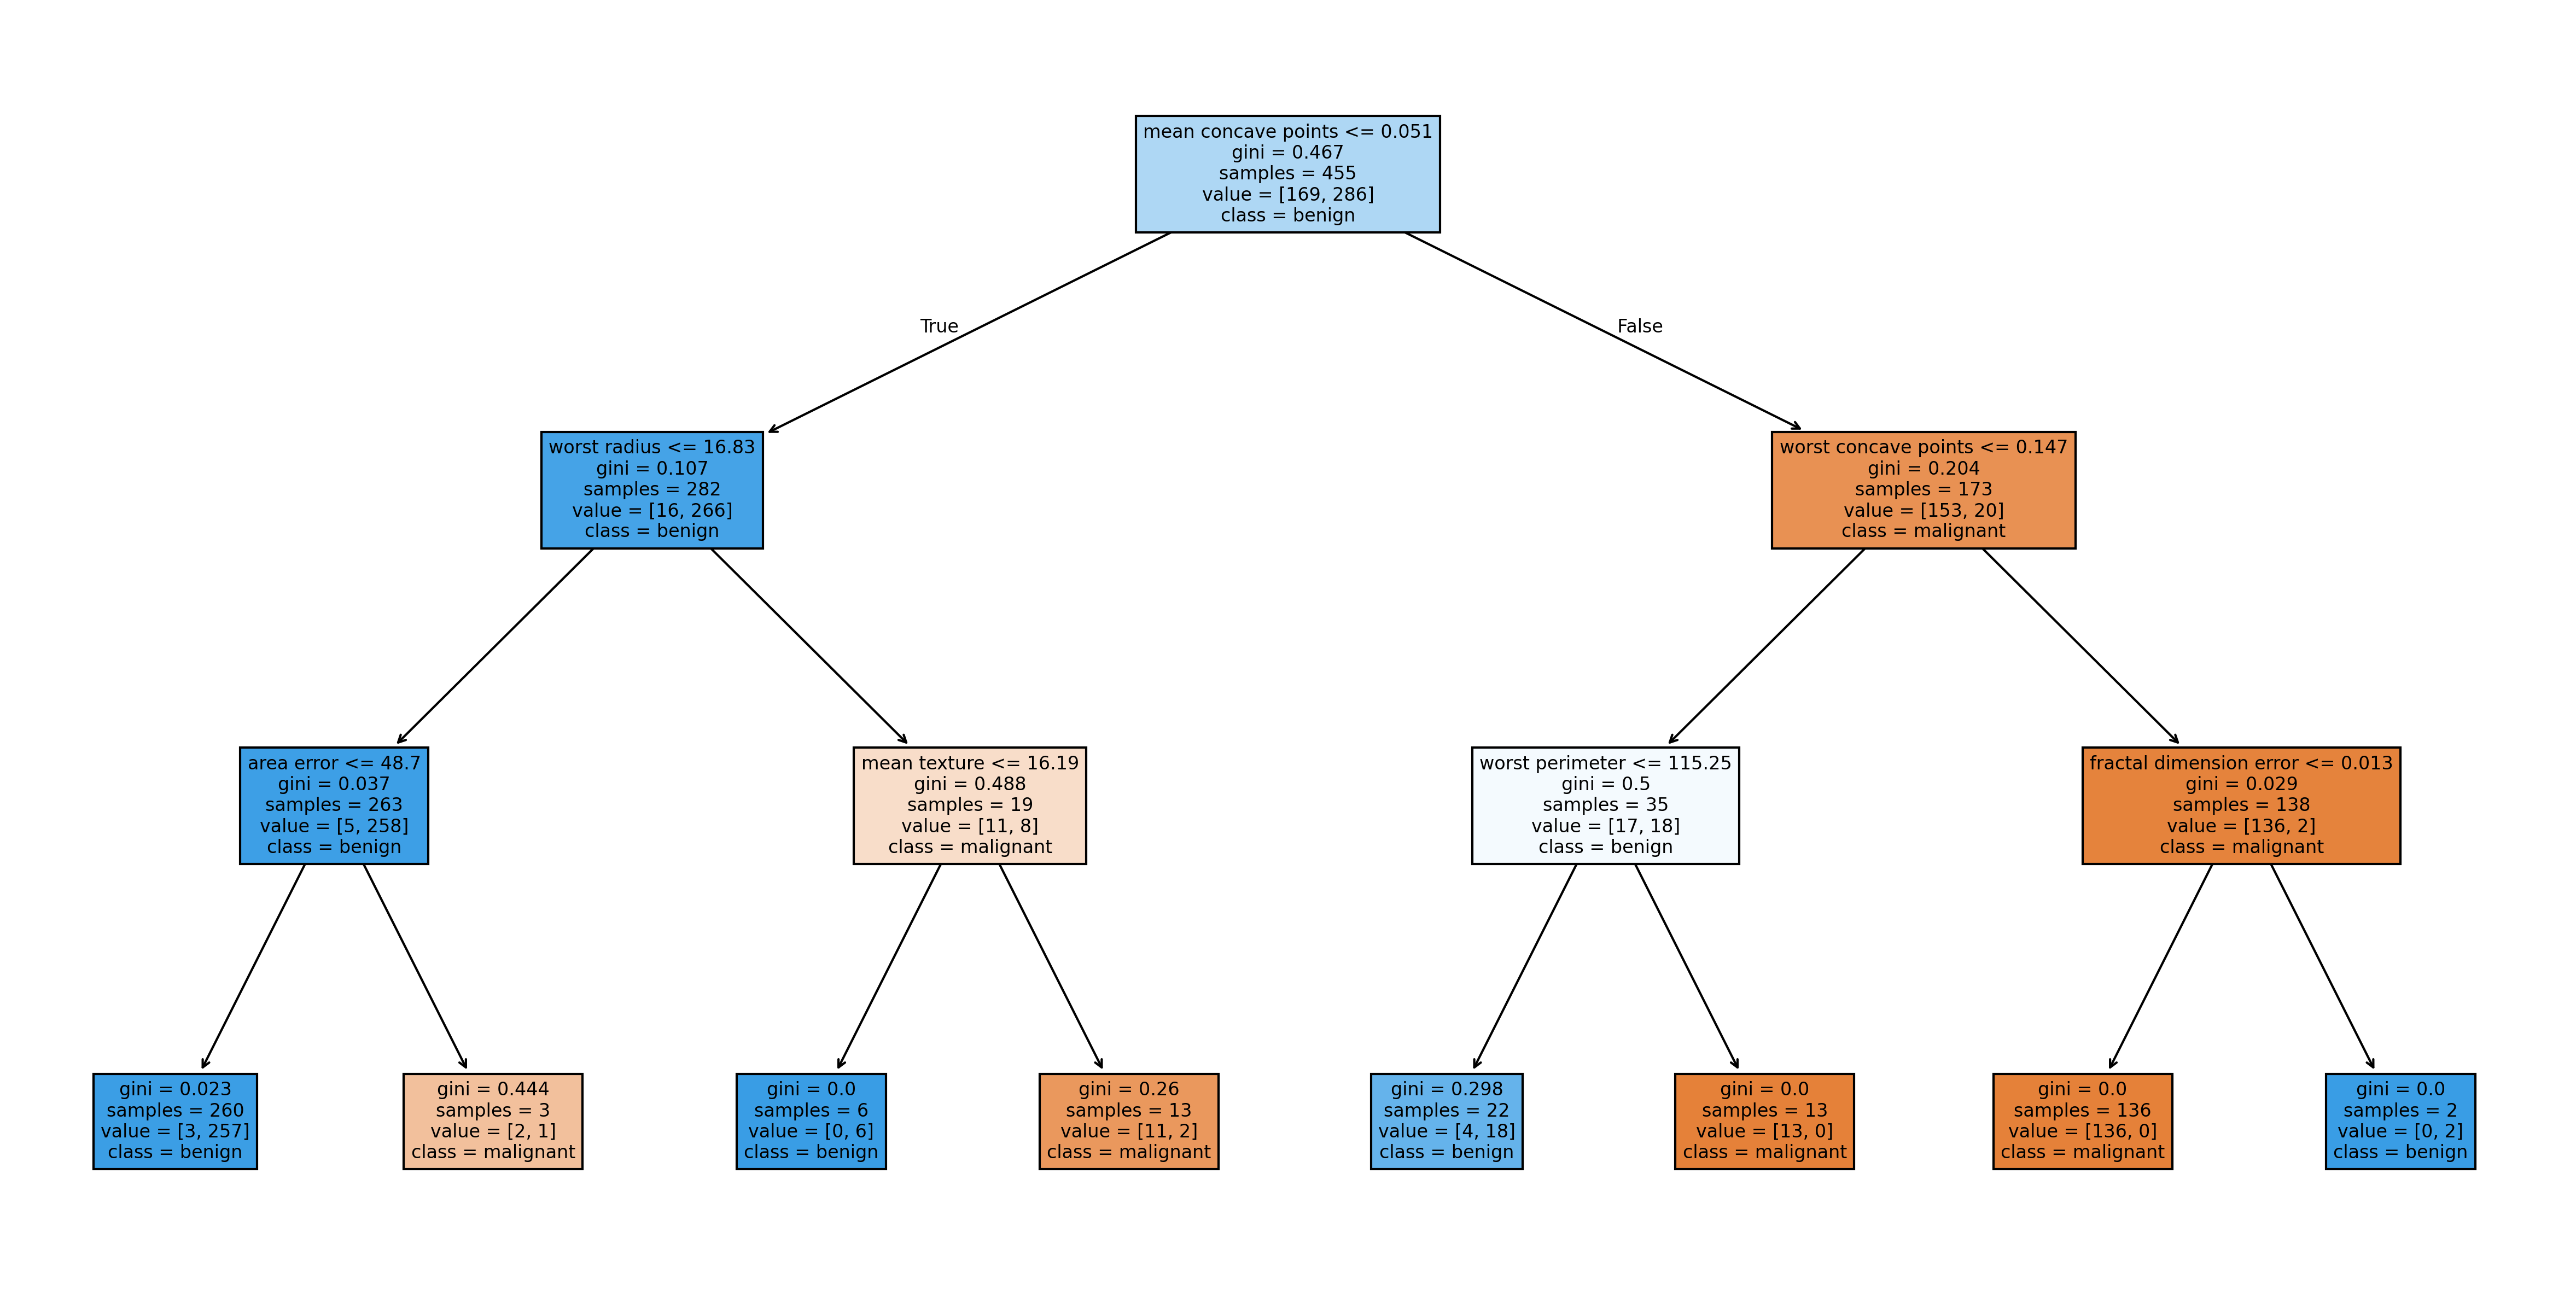

In [16]:
plt.figure(figsize=(20,10), dpi=300)
from sklearn.tree import plot_tree
plot_tree(best_tree_model, feature_names=cancer_data.feature_names, class_names=cancer_data.target_names, filled=True)
plt.show()